In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import numpy as np
import os

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
plt.style.use(['ggplot'])

In [4]:
def read_csv_ym(station_name1, station_name2, year, month):
    if year != '2020':
        df1 = pd.read_csv(f'station_name_no_nan/{station_name1}/{year}/{station_name1}_{year}_{month}.csv')
        df2 = pd.read_csv(f'station_name_no_nan/{station_name2}/{year}/{station_name2}_{year}_{month}.csv')
    else:
        df1 = pd.read_csv(f'station_name_no_nan/{station_name1}/{year}/{station_name1}_2020_1.csv')
        df2 = pd.read_csv(f'station_name_no_nan/{station_name2}/{year}/{station_name2}_2020_1.csv')
    return df1, df2

In [5]:
def make_list(df, pm, date):
    resultArr = np.zeros((25,date))
    if pm == 10:
        # DataFrame.'특성명'.'데이터'.'행렬'.'transpose'
        pm10_Arr = df.pm10.values.reshape(date,24).T
        # 행렬 연산을 통해 위의 24x31행렬을 25x32행렬로 확장해줌
        resultArr[1:,:] = resultArr[1:,:] + pm10_Arr
        return resultArr.tolist()
    elif pm == 2.5:
        pm25_Arr = df.pm25.values.reshape(date,24).T
        resultArr[1:,:] = resultArr[1:,:] + pm25_Arr
        return resultArr.tolist()
    else:
        print('check your pm!!!')

In [6]:
def make_si_list(df, month, pm):
    month31 = ['1','3','5','7','8','10','12']
    month30 = ['4','6','9','11']
    month28 = ['2'] # 2016년 2월은 그냥 빼자...
    # 31일까지 있는 달
    if month in month31:
        return make_list(df, pm, 31)
    # 30일까지 있는 달
    elif month in month30:
        return make_list(df, pm, 30)
    # 28일까지 있는 달
    elif month in month28:
        return make_list(df, pm, 28)
    else:
        print("isn't your year 2016 ???")

In [7]:
# 결측치 0 을 지우는 함수
def del_nan(si_list1, si_list2):
    new_si_list1=[]
    new_si_list2=[]
    for i in range(len(si_list1)):
        if (si_list1[i] * si_list2[i]) != 0:
            new_si_list1.append(si_list1[i])
            new_si_list2.append(si_list2[i])
    return new_si_list1, new_si_list2

In [8]:
# 변수의 이름을 가져와서 label을 만들기 쉽게 한다.
def namestr(obj):
    return [name for name in globals() if globals()[name] is obj][0]

In [9]:
def plot_compare(station1, station2, time):
    st1, st2 = del_nan(station1[time], station2[time])
    plt.plot(st1, label=f'{namestr(station1)} : {time}시')
    plt.plot(st2, label=f'{namestr(station2)} : {time}시')

In [10]:
def plot_compare_rev1(station1, station2, time):
    plt.plot(station1, label=f'{namestr(station1)} : {time}시')
    plt.plot(station2, label=f'{namestr(station2)} : {time}시')

In [11]:
st1 = 'Yongsan_Hangandaero'
st2 = 'Yongsan_Hannamdaero'

In [12]:
year = '2018'

month = '7'

In [13]:
df1, df2 = read_csv_ym(st1, st2, year, month)

동일 시간 1~12월 비교

In [14]:
def chai_cal(list1, list2):
    tlen = len(list1) # list의 크기 (nan 값을 제외한)
    chai_hap = 0
    for i in range(tlen):
        chai_hap += list1[i] - list2[i]
    if chai_hap < 0:
        print('chai합이 0보다 작음')
    avg_chai = chai_hap / tlen
    avg_chai = round(avg_chai,2)
    return avg_chai

In [15]:
avg_chai_list=[]
for month in range(1,13):
    month = str(month)
    df1, df2 = read_csv_ym(st1, st2, year, month) # df 읽어오기
    time = 12 # 여기를 바꿔야
    # 'time' 시각의 list 생성 (결측치도 삭제)
    hangangdaero, hannamdaero = del_nan(make_si_list(df1, month, 10)[time], make_si_list(df2, month, 10)[time])
    # 리스트에 평균 차이 저장
    avg_chai_list.append(chai_cal(hangangdaero, hannamdaero))

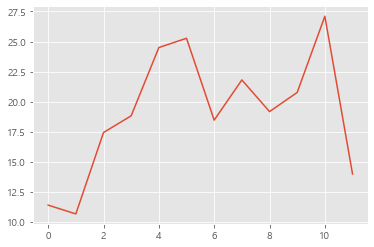

In [16]:
plt.plot(avg_chai_list)
plt.show()

In [17]:
def biyul_cal(list1,list2):
    tlen = len(list1) # list의 크기 (nan 값을 제외한)
    sumA = sumB = 0
    for i in range(tlen):
        sumA += list1[i]
        sumB += list2[i]
    biyul = (sumA/sumB)*100
    biyul = round(biyul,2)
    return biyul

In [18]:
def biyul_plot(st1, st2, year, time):
    biyul_list=[]
    for month in range(1,13):
        month = str(month)
        df1, df2 = read_csv_ym(st1, st2, year, month) # df 읽어오기
        # 'time' 시각의 list 생성 (결측치도 삭제)
        hangangdaero, hannamdaero = del_nan(make_si_list(df1, month, 10)[time], make_si_list(df2, month, 10)[time])
        # 리스트에 평균 차이 저장
        biyul_list.append(biyul_cal(hangangdaero, hannamdaero))
    return biyul_list

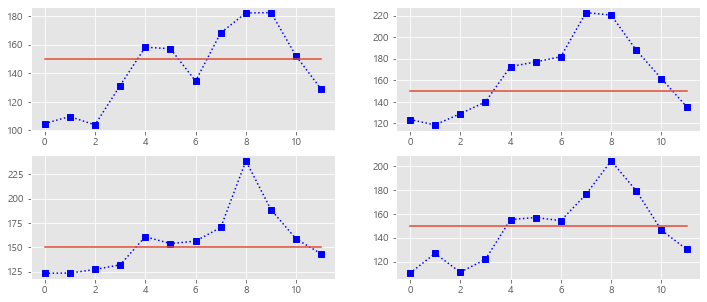

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(221)
plt.plot(biyul_plot(st1,st2,year,6),'bs:')
plt.plot([150 for _ in range(12)])

plt.subplot(222)
plt.plot(biyul_plot(st1,st2,year,12),'bs:')
plt.plot([150 for _ in range(12)])

plt.subplot(223)
plt.plot(biyul_plot(st1,st2,year,18),'bs:')
plt.plot([150 for _ in range(12)])

plt.subplot(224)
plt.plot(biyul_plot(st1,st2,year,24),'bs:')
plt.plot([150 for _ in range(12)])


plt.show()

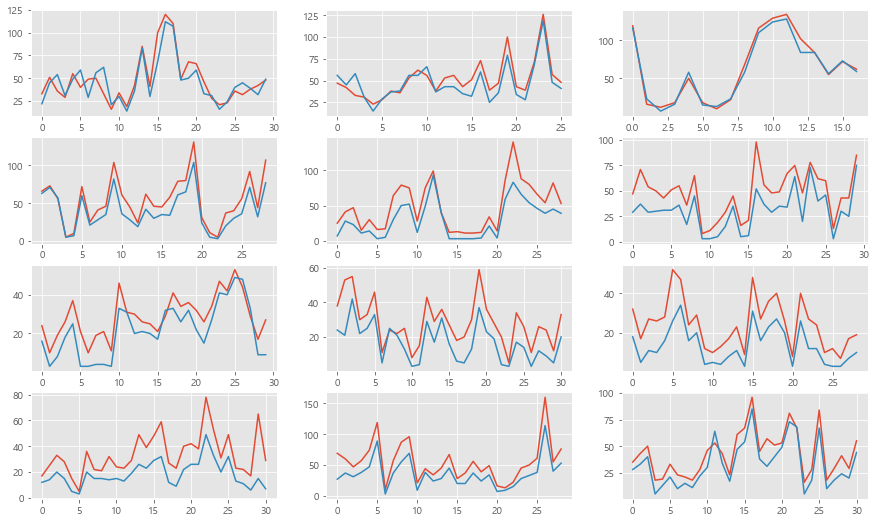

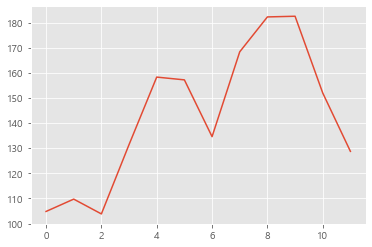

[104.8, 109.71, 103.82, 131.41, 158.27, 157.17, 134.57, 168.33, 182.22, 182.49, 151.95, 128.72]


In [20]:
time = 6
plt.figure(figsize=(15,9))
biyul_list=[]
for month in range(1,13):
    month = str(month)
    df1, df2 = read_csv_ym(st1, st2, year, month) # df 읽어오기
    # 'time' 시각의 list 생성 (결측치도 삭제)
    hangangdaero, hannamdaero = del_nan(make_si_list(df1, month, 10)[time], make_si_list(df2, month, 10)[time])
    
    biyul_list.append(biyul_cal(hangangdaero, hannamdaero))
    
    plt.subplot(4,3,int(month))
    plt.plot(hangangdaero)
    plt.plot(hannamdaero)
plt.show()

plt.plot(biyul_list)
plt.show()
print(biyul_list)